In [1]:
import pandas as pd
import pandas_profiling

import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px

First, I think it's good to start with some grounding facts so that we can evaluate the following data in context.
* At the end of 2013, the average UK house price was £175,826. In February 2022, the average UK house price was £277,000.
* In 2019, Birmingham had a population of 1.149 million people, 40% of whom were under 25.
* Birmingham is known for its historic manufacturing sector, strong transport links, and vibrant music scene.

* 41.7% of people own their own home, 30.9% rent from private landlords, 24.4% rent from social landlords.
* The average income is £24,298, slightly below the UK average of £25,971.

In [66]:
hs2 = gpd.read_file("/Users/ruth/Downloads/Test Data Science/HS2.shp")
brum = gpd.read_file("/Users/ruth/Downloads/data 3/Census_Residential_Data_Pack_2011/Local_Authority_Districts/E08000025/shapefiles/E08000025.shp")
sol = gpd.read_file("/Users/ruth/Downloads/imd sol/Index_of_Multiple_Deprivation_IMD/Local_Authority_Districts/E08000029/shapefiles/E08000029.shp")

In [6]:
brum.head()

lsoa11cd                                           geometry
0  E01008881  POLYGON ((412538.038 285650.869, 412579.962 28...
1  E01008882  POLYGON ((412137.781 285396.632, 412136.266 28...
2  E01008883  POLYGON ((411851.000 284958.000, 411851.000 28...
3  E01008884  POLYGON ((411324.157 285101.099, 411351.252 28...
4  E01008885  POLYGON ((413064.879 284599.734, 413065.664 28...

In [10]:
hs2.shape

(1, 3)

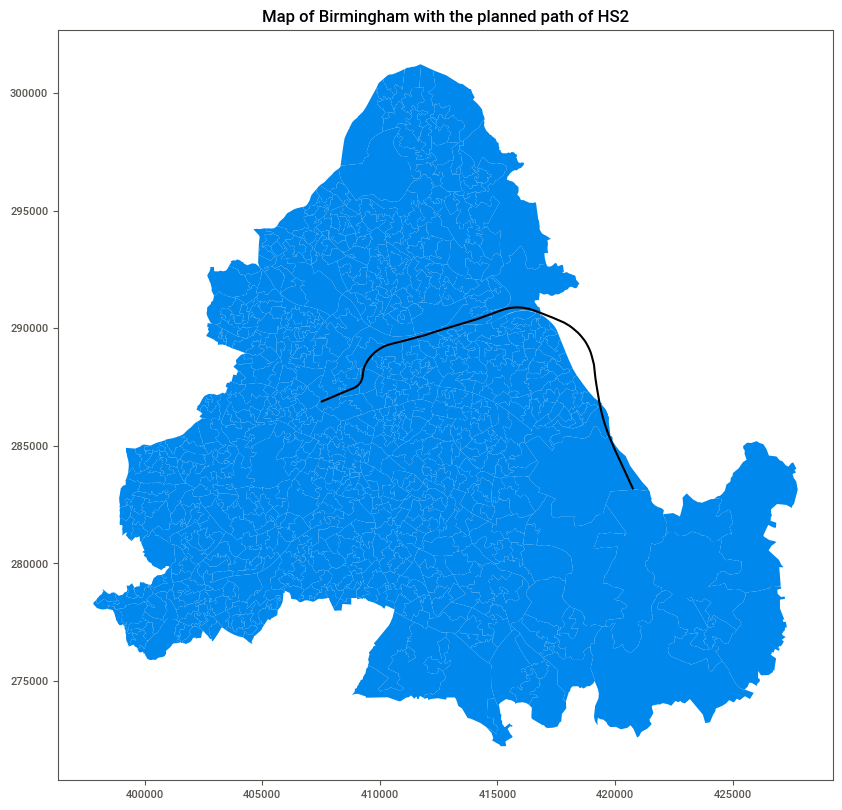

In [76]:
fig, ax = plt.subplots(figsize = (10,10))
brum.plot(ax=ax)
sol.plot(ax=ax)
hs2.plot(ax=ax,color='black')
plt.title('Map of Birmingham with the planned path of HS2')
plt.show()

This is just a basic shapefile showing the path of HS2 into Birmingham and Solihull.

# Data exploration

In [8]:
dfr = pd.read_csv("/Users/ruth/Downloads/Test Data Science/Land Registry Price Paid Data.csv")

In [9]:
dfa = pd.read_csv("/Users/ruth/Downloads/Test Data Science/VOA Property Age Data.csv")
dft = pd.read_csv("/Users/ruth/Downloads/Test Data Science/VOA Property Type Data.csv")

In [119]:
dfa.describe()

Pre_1900     1900_1918     1919_1929     1930_1939     1945_1954  \
count    936.000000    936.000000    936.000000    936.000000    936.000000   
mean     175.480769    123.354701    165.138889    287.435897    114.529915   
std     1754.574581   1222.562342   1630.404622   2546.243379    985.069390   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000     10.000000      0.000000   
50%       10.000000     10.000000     20.000000     70.000000     10.000000   
75%      100.000000     72.500000    110.000000    250.000000     70.000000   
max    53130.000000  37040.000000  49370.000000  76320.000000  28980.000000   

          1955_1964     1965_1972     1973_1982     1983_1992     1993_1999  \
count    936.000000    936.000000    936.000000    936.000000    936.000000   
mean     155.480769    209.839744    132.585470     80.170940     60.267094   
std     1217.587508   1606.105822   1146.141139    630.251942    506.070563   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000     10.000000      0.000000      0.000000      0.000000   
50%       30.000000     50.000000     20.000000     10.000000     10.000000   
75%      130.000000    140.000000    100.000000     60.000000     40.000000   
max    34060.000000  43420.000000  33940.000000  17510.000000  14790.000000   

          2000_2008    2009_2011    2012_2014    2015_2017    2018_2020  \
count    936.000000   936.000000   936.000000   936.000000   936.000000   
mean      95.598291    25.683761    24.764957    32.991453    28.514957   
std      829.912092   231.988757   214.171575   285.202290   269.759322   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%       10.000000     0.000000     0.000000     0.000000     0.000000   
75%       50.000000    10.000000    10.000000    10.000000    10.000000   
max    24330.000000  6820.000000  6240.000000  8270.000000  7770.000000   

           UNKNOWN    Year  
count   936.000000   936.0  
mean     25.608974  2020.0  
std     217.367952     0.0  
min       0.000000  2020.0  
25%       0.000000  2020.0  
50%      10.000000  2020.0  
75%      20.000000  2020.0  
max    6390.000000  2020.0

Just looking at this to see available housing: lots of pre-1900! lots of 1920s and 1930s, some late 60s, then steady decline. Most common is 1930s.

In [120]:
dft.describe()

Bungalow1    Bungalow2    Bungalow3  Bungalow3plus  Bungalow4plus  \
count   871.000000   886.000000  1000.000000     825.000000    1000.000000   
mean     26.865672    27.866817     0.460000      21.284848       0.010000   
std     176.829495   174.133102     7.102031     129.137533       0.316228   
min       0.000000     0.000000     0.000000       0.000000       0.000000   
25%       0.000000     0.000000     0.000000       0.000000       0.000000   
50%      10.000000    10.000000     0.000000       0.000000       0.000000   
75%      20.000000    20.000000     0.000000      10.000000       0.000000   
max    4630.000000  4200.000000   170.000000    2910.000000      10.000000   

         BungalowZ    Flat_Mais1    Flat_Mais2   Flat_Mais3  Flat_Mais3plus  \
count  1000.000000    941.000000    959.000000  1000.000000      843.000000   
mean      0.270000    190.467588    194.056309     4.280000       49.051008   
std       2.575604   1636.885208   1430.970341    23.888329      397.182238   
min       0.000000      0.000000      0.000000     0.000000        0.000000   
25%       0.000000     20.000000     20.000000     0.000000        0.000000   
50%       0.000000     60.000000     60.000000     0.000000       10.000000   
75%       0.000000    140.000000    150.000000     0.000000       40.000000   
max      40.000000  49150.000000  41840.000000   410.000000    11230.000000   

       ...  House_Detached1  House_Detached2  House_Detached3  \
count  ...      1000.000000       778.000000       952.000000   
mean   ...         0.050000         5.398458        94.023109   
std    ...         1.048141        35.819627       606.766517   
min    ...         0.000000         0.000000         0.000000   
25%    ...         0.000000         0.000000         0.000000   
50%    ...         0.000000         0.000000        20.000000   
75%    ...         0.000000         0.000000        80.000000   
max    ...        30.000000       780.000000     15110.000000   

       House_Detached3plus  House_Detached4plus  House_DetachedZ  Annexe  \
count           957.000000           915.000000       1000.00000  1000.0   
mean            224.670846           137.158470          4.15000     0.0   
std            1410.668119           836.593601         31.11343     0.0   
min               0.000000             0.000000          0.00000     0.0   
25%              10.000000             0.000000          0.00000     0.0   
50%              40.000000            10.000000          0.00000     0.0   
75%             170.000000            80.000000          0.00000     0.0   
max           31330.000000         16220.000000        600.00000     0.0   

             Other      UNKNOWN         Year  
count  1000.000000  1000.000000  1000.000000  
mean      1.510000    19.350000  2011.612000  
std      13.408941   186.685106     0.935056  
min       0.000000     0.000000  2011.000000  
25%       0.000000     0.000000  2011.000000  
50%       0.000000     0.000000  2011.000000  
75%       0.000000    10.000000  2012.000000  
max     250.000000  5790.000000  2014.000000  

[8 rows x 34 columns]

Can see that there are a lot more flats available than anything else, a fair few bungalows, and these skew smaller (1-2 bedrooms are most common). Detached houses, on the other hand, usually have at least 3 bedrooms. It would be interesting to see where these were located.

In [49]:
dfr.head()

LRUniqueID  SalePrice    SaleDate    PCUnit  \
0  {61D8894E-7617-3DE6-E053-6C04A8C01207}     485000  11/12/2017   B74 4YQ   
1  {288DCE29-E48F-E510-E050-A8C06205480E}     325000  25/11/2015  B74 4YQ    
2  {68FEB20C-1FF3-38DA-E053-6C04A8C051AE}     425000  12/02/2018   B74 4YQ   
3  {FD3E6AA4-2E99-4511-8D0F-DE209CA53092}     127000  02/09/2011  B74 4JD    
4  {2AB33436-EEE8-4102-80B1-DA21CE5CC9F9}     167000  20/12/2013  B74 4JD    

  PropertyType NewBuild Freehold              Add1              Add2  \
0            D        N        F                 2               NaN   
1            D        N        F                 6               NaN   
2            D        N        F                 4               NaN   
3            F        N        L  WYNDLEY MANOR, 2            FLAT 6   
4            F        N        L           FLAT 23  WYNDLEY MANOR, 2   

            Add3  ...              Add5        Add6           Add7  \
0    KEATS CLOSE  ...  SUTTON COLDFIELD  BIRMINGHAM  WEST MIDLANDS   
1    KEATS CLOSE  ...  SUTTON COLDFIELD  BIRMINGHAM  WEST MIDLANDS   
2    KEATS CLOSE  ...  SUTTON COLDFIELD  BIRMINGHAM  WEST MIDLANDS   
3  WYNDLEY CLOSE  ...  SUTTON COLDFIELD  BIRMINGHAM  WEST MIDLANDS   
4  WYNDLEY CLOSE  ...  SUTTON COLDFIELD  BIRMINGHAM  WEST MIDLANDS   

  LocalAuthorityCode CensusLSOA   CensusOA Easting  Northing  Longitude  \
0          E08000025  E01009433  E00047764  410856    300912  -1.841131   
1          E08000025  E01009433  E00047764  410856    300912  -1.841131   
2          E08000025  E01009433  E00047764  410856    300912  -1.841131   
3          E08000025  E01009433  E00047764  411000    300888  -1.839005   
4          E08000025  E01009433  E00047764  411000    300888  -1.839005   

    Latitude  
0  52.605885  
1  52.605885  
2  52.605885  
3  52.605666  
4  52.605666  

[5 rows x 21 columns]

In [50]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171401 entries, 0 to 171400
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   LRUniqueID          171401 non-null  object 
 1   SalePrice           171401 non-null  int64  
 2   SaleDate            171401 non-null  object 
 3   PCUnit              171401 non-null  object 
 4   PropertyType        171401 non-null  object 
 5   NewBuild            171401 non-null  object 
 6   Freehold            171401 non-null  object 
 7   Add1                167068 non-null  object 
 8   Add2                28702 non-null   object 
 9   Add3                171401 non-null  object 
 10  Add4                60833 non-null   object 
 11  Add5                171401 non-null  object 
 12  Add6                171401 non-null  object 
 13  Add7                171401 non-null  object 
 14  LocalAuthorityCode  171401 non-null  object 
 15  CensusLSOA          171401 non-nul

In [54]:
# Converting date format

dfr['SaleDate'] = pd.to_datetime(dfr['SaleDate'])

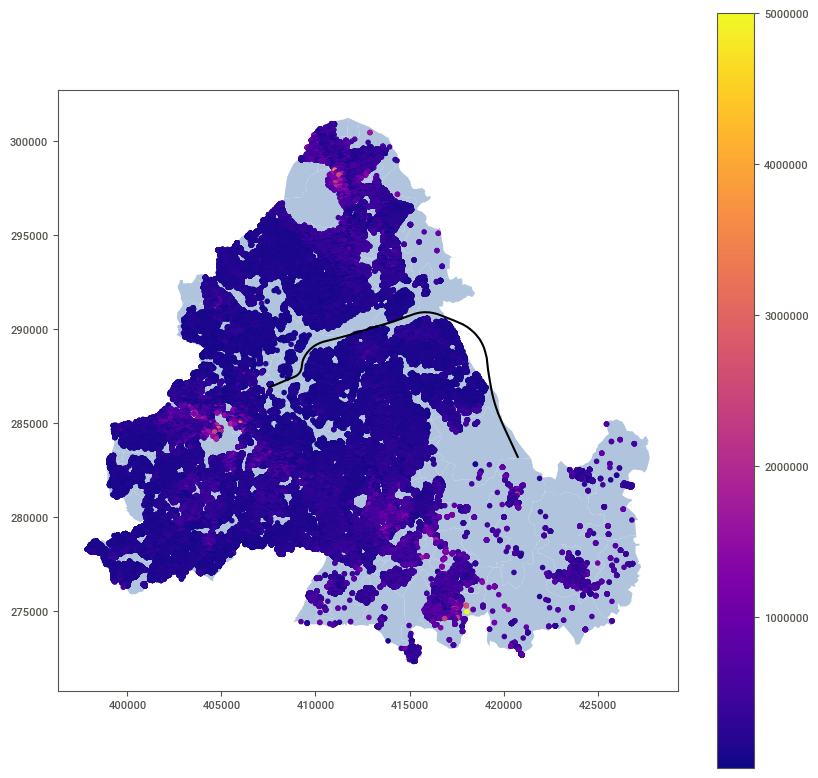

In [122]:
# Plotting items from registry on map, using colour to show price

fig, ax = plt.subplots(figsize = (10,10))
brum.plot(ax=ax, color='lightsteelblue')
sol.plot(ax=ax, color='lightsteelblue')
hs2.plot(ax=ax,color='black')
plt.scatter(x=dfr['Easting'], y=dfr['Northing'], c=dfr['SalePrice'],cmap='plasma')
plt.colorbar()
plt.show()

Here we can have a quick look for trends in sale price: properties are more expensive near the city centre, in the north near the park, and in the southeast in Solihull. There are significantly fewer properties available in Solihull compared to main Birmingham, and there are a few areas in Birmingham where there are no properties: following the path of HS2, in the city centre, and at the top, which looks like it could be Sandwell Country Park. We can also see a faint triangle between the city centre, the country park, and the centre of Solihull, where prices are slightly higher. The properties near HS2 are among the cheapest. In general, Solihull properties are more expensive than Birmingham ones.

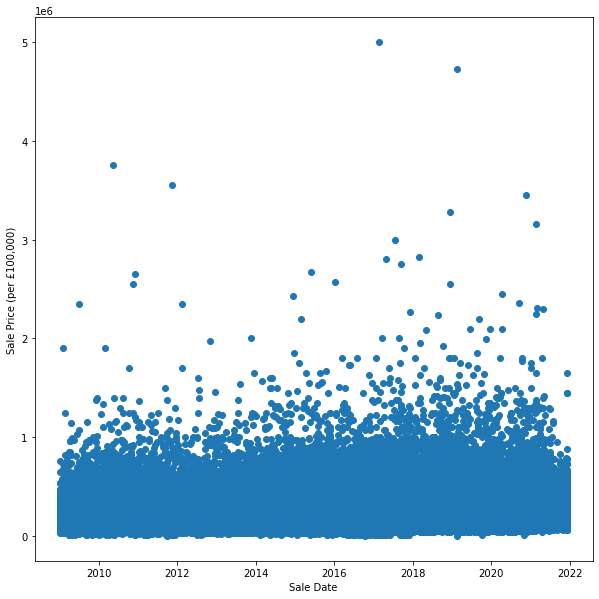

In [72]:
# Plot price against sale date to track changes

fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(dfr['SaleDate'],dfr['SalePrice'])
plt.xlabel("Sale Date")
plt.ylabel("Sale Price (per £100,000)")
plt.show()

In [65]:
# Generate EDA report

pandas_profiling.ProfileReport(dfr)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Key takeaways:
Median house price is £165000 - 75% are between £120,000 and £245,000. Of the cheapest, these could be mistakes, or they could be special circumstances eg charity raffle. Cheapest was £1 followed by 2500, most expensive was sold for 5 million. Definitely some mistakes eg the house listed in Greater London!


Sales rose in around 2013 and stayed roughly level until early 2020 - presumably the impact of the pandemic.
Most common property types are semi-detached (56262) and terraced (55572) and the least common is detached (25554).
Most sales were of freeholds rather than leaseholds (125092 vs 46309) and vast majority were not new builds (156820 vs 14581).




In [75]:
# Generate bivariate analysis report.

import sweetviz
my_report = sweetviz.analyze([dfr,'Train'], target_feat='SalePrice')
my_report.show_html('FinalReport.html')

                                             |          | [  0%]   00:00 -> (? left)

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


This gives us a lot more information: we can see that despite being the rarest sale type, detached houses are by far the most expensive, coming in at around 400k. New builds are on average £15k more expensive than non new builds.

In [101]:
broadbandbrum = pd.read_csv("/Users/ruth/Downloads/data 4/Fixed_Broadband/Local_Authority_Districts/E08000025/tables/E08000025_2018.csv")
broadbandsoli = pd.read_csv("/Users/ruth/Downloads/data 5/Fixed_Broadband/Local_Authority_Districts/E08000029/tables/E08000029_2018.csv")

In [102]:
broadbandbrum.head()

oa11cd   lsoa11cd  Median.download.speed..Mbit.s.  \
0  E00045077  E01008891                            40.0   
1  E00045078  E01008893                            50.0   
2  E00045079  E01008894                            23.0   
3  E00045080  E01008889                            50.0   
4  E00045081  E01008889                            50.0   

   Average.download.speed..Mbit.s.  Minimum.download.speed..Mbit.s.  \
0                             54.4                              3.1   
1                             66.6                              6.1   
2                             43.8                              4.3   
3                             63.8                              0.3   
4                             53.6                              6.2   

   Maximum.download.speed..Mbit.s.  \
0                            200.0   
1                            200.0   
2                            200.0   
3                            200.0   
4                            200.0   

   Average.download.speed..Mbit.s..for.lines...10Mbit.s  \
0                                                7.0      
1                                                7.9      
2                                                8.0      
3                                                3.3      
4                                                7.4      

   Average.download.speed..Mbit.s..for.lines.10.30Mbit.s  \
0                                               16.3       
1                                               15.1       
2                                               21.4       
3                                               19.2       
4                                               17.1       

   Average.download.speed..Mbit.s..for.SFBB.lines  \
0                                            75.4   
1                                            92.4   
2                                            94.5   
3                                            83.3   
4                                            80.2   

   Average.download.speed..Mbit.s..for.UFBB.lines  ...  \
0                                             NaN  ...   
1                                             NaN  ...   
2                                             NaN  ...   
3                                             NaN  ...   
4                                             NaN  ...   

   Number.of.premises.with.UFBB.availability  \
0                                      120.0   
1                                      153.0   
2                                      155.0   
3                                      148.0   
4                                      116.0   

   Number.of.premises.with.Full.Fibre.availability  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Number.of.premises.unable.to.receive.2Mbit.s  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Number.of.premises.unable.to.receive.5Mbit.s  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Number.of.premises.unable.to.receive.10Mbit.s  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   Number.of.premises.unable.to.receive.30Mbit.s  \
0                 

In [105]:
broadband = pd.concat([broadbandbrum,broadbandsoli])

In [106]:
broadband

oa11cd   lsoa11cd  Median.download.speed..Mbit.s.  \
0    E00045077  E01008891                            40.0   
1    E00045078  E01008893                            50.0   
2    E00045079  E01008894                            23.0   
3    E00045080  E01008889                            50.0   
4    E00045081  E01008889                            50.0   
..         ...        ...                             ...   
662  E00168175  E01032886                            40.0   
663  E00168176  E01010181                            40.0   
664  E00168177  E01032886                            68.4   
665  E00168178  E01010181                            40.0   
666  E00168179  E01010233                            50.0   

     Average.download.speed..Mbit.s.  Minimum.download.speed..Mbit.s.  \
0                               54.4                              3.1   
1                               66.6                              6.1   
2                               43.8                              4.3   
3                               63.8                              0.3   
4                               53.6                              6.2   
..                               ...                              ...   
662                             40.7                              2.9   
663                             34.3                              2.0   
664                             58.3                              2.0   
665                             43.1                              1.8   
666                             62.8                              2.3   

     Maximum.download.speed..Mbit.s.  \
0                              200.0   
1                              200.0   
2                              200.0   
3                              200.0   
4                              200.0   
..                               ...   
662                             80.0   
663                             80.0   
664                             80.0   
665                             80.0   
666                            200.0   

     Average.download.speed..Mbit.s..for.lines...10Mbit.s  \
0                                                  7.0      
1                                                  7.9      
2                                                  8.0      
3                                                  3.3      
4                                                  7.4      
..                                                 ...      
662                                                4.6      
663                                                4.6      
664                                                4.9      
665                                                3.7      
666                                                7.1      

     Average.download.speed..Mbit.s..for.lines.10.30Mbit.s  \
0                                                 16.3       
1                                                 15.1       
2                                                 21.4       
3                                                 19.2       
4                                                 17.1       
..                                                 ...       
662                                               19.4       
663                                               16.7       
664                                                NaN       
665                                               22.2       
666                                               14.2       

     Average.download.speed..Mbit.s..for.SFBB.lines  \
0                                              75.4   
1                                              92.4   
2                                              94.5   
3                                              83.3   
4                                              80.2   
..                                              ...   
662                                            52.7   

In [107]:
dfmerged = dfr.merge(broadband, left_on='CensusOA', right_on='oa11cd')

In [108]:
dfmerged

LRUniqueID  SalePrice   SaleDate  \
0       {61D8894E-7617-3DE6-E053-6C04A8C01207}     485000 2017-11-12   
1       {288DCE29-E48F-E510-E050-A8C06205480E}     325000 2015-11-25   
2       {68FEB20C-1FF3-38DA-E053-6C04A8C051AE}     425000 2018-12-02   
3       {FD3E6AA4-2E99-4511-8D0F-DE209CA53092}     127000 2011-02-09   
4       {2AB33436-EEE8-4102-80B1-DA21CE5CC9F9}     167000 2013-12-20   
...                                        ...        ...        ...   
171396  {55C79003-D5A8-444D-9D2E-B17D8CA4823F}     250000 2014-05-20   
171397  {85866A64-FA59-143F-E053-6B04A8C06A15}     341000 2019-02-28   
171398  {BEF7EBBF-73D5-7A76-E053-6B04A8C092F7}     300000 2021-01-15   
171399  {85866A64-F993-143F-E053-6B04A8C06A15}     146800 2019-08-02   
171400  {8355F009-3182-55C5-E053-6B04A8C0D090}     128450 2018-12-20   

          PCUnit PropertyType NewBuild Freehold              Add1  \
0        B74 4YQ            D        N        F                 2   
1       B74 4YQ             D        N        F                 6   
2        B74 4YQ            D        N        F                 4   
3       B74 4JD             F        N        L  WYNDLEY MANOR, 2   
4       B74 4JD             F        N        L           FLAT 23   
...          ...          ...      ...      ...               ...   
171396  B94 6QX             D        N        F                 4   
171397   B94 6QX            S        N        F                 7   
171398   B94 6QX            D        N        F                 8   
171399   B94 5BN            S        Y        L                10   
171400   B94 5BN            S        Y        L                 7   

                    Add2           Add3  ...  \
0                    NaN    KEATS CLOSE  ...   
1                    NaN    KEATS CLOSE  ...   
2                    NaN    KEATS CLOSE  ...   
3                 FLAT 6  WYNDLEY CLOSE  ...   
4       WYNDLEY MANOR, 2  WYNDLEY CLOSE  ...   
...                  ...            ...  ...   
171396               NaN    SPRING LANE  ...   
171397               NaN    SPRING LANE  ...   
171398               NaN    SPRING LANE  ...   
171399               NaN     WEBB GROVE  ...   
171400               NaN     WEBB GROVE  ...   

       Number.of.premises.with.UFBB.availability  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
171396                                       0.0   
171397                                       0.0   
171398                                       0.0   
171399                                       0.0   
171400                                       0.0   

       Number.of.premises.with.Full.Fibre.availability  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  0.0   
...                                                ...   
171396                                             0.0   
171397                                             0.0   
171398                                             0.0   
171399                                             0.0   
171400                                             0.0   

       Number.of.premises.unable.to.receive.2Mbit.s  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
171396                                          0.0   
171

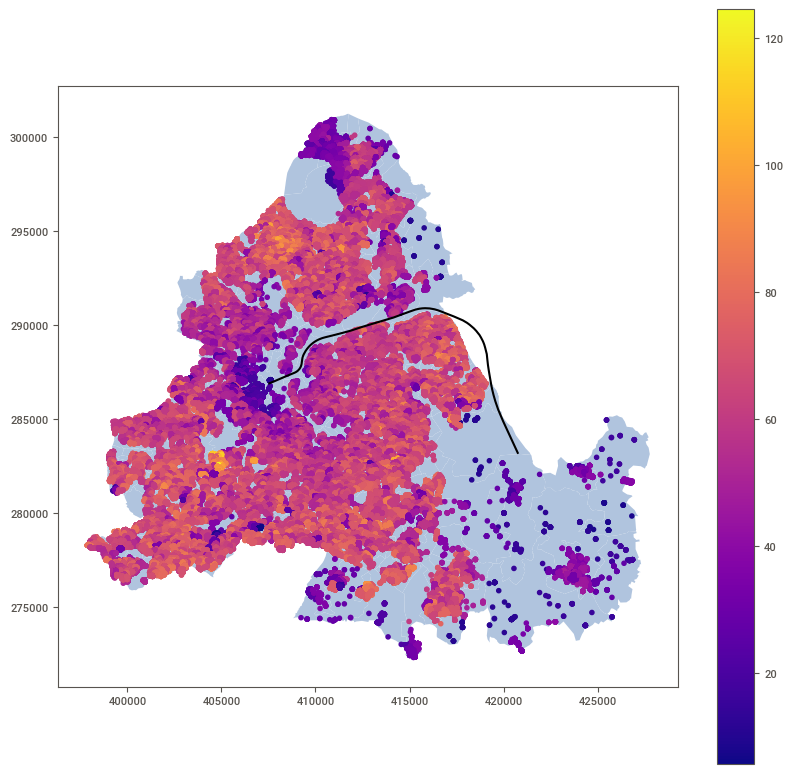

In [110]:
fig, ax = plt.subplots(figsize = (10,10))
brum.plot(ax=ax, color='lightsteelblue')
sol.plot(ax=ax, color='lightsteelblue')
hs2.plot(ax=ax,color='black')
plt.scatter(x=dfmerged['Easting'], y=dfmerged['Northing'], c=dfmerged['Average.download.speed..Mbit.s.'],cmap='plasma')
plt.colorbar()
plt.show()

Interesting that where HS2 ends, there is a significant drop in wifi speed. From this, the expensive areas we previously identified don't stand out, so it's not likely to be a factor raising prices. At first glance, we can see that rural Solihull properties have slower speeds, as do properties at the top of Birmingham; highest speeds can be found just south of the city centre.

<AxesSubplot:>

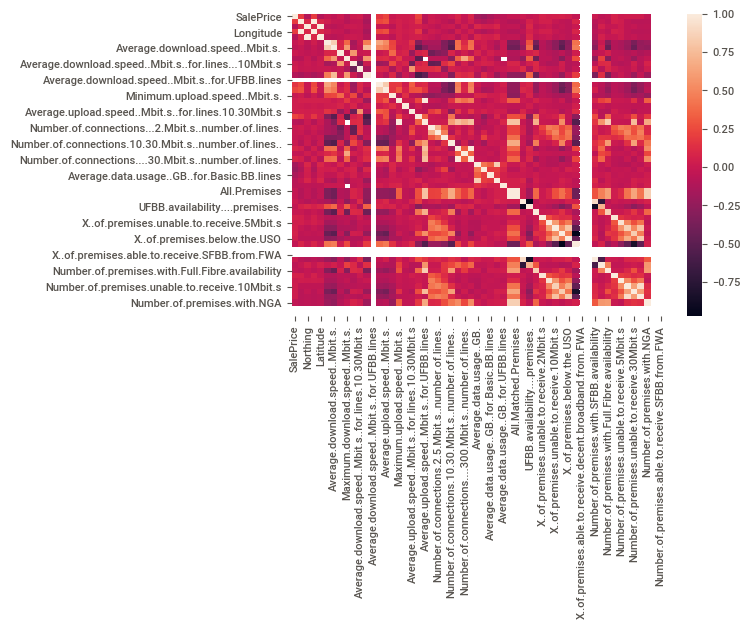

In [114]:
sns.heatmap(dfmerged.corr())

Looking at the heatmap reveals there is a slight correlation between average wifi speed and property prices.

If I had more time, I would have worked more on interconnectivity between factors, eg complex relationships to identify specific types of property by age + type + price + location, to get more complex info. Would also be great to get the time spent on the market, average buyer etc. Further factors to look at could be access to supermarkets, schools + universities, transport links, population demographics, or look at change over a longer period of time.

I originally planned a predictive model, but realised this is unnecessary before I completely understand the original data. However, some of the preprocessing steps, such as finding correlations between variables and looking for differences in scale, can be helpful in the EDA process.

SOURCES

https://data.cdrc.ac.uk/geodata-packs
https://birmingham.cmis.uk.com/Birmingham/Document.ashx?czJKcaeAi5tUFL1DTL2UE4zNRBcoShgo=4aVPYp%2BIVP9aCXQC2cYfOPcnCpAOPhmiCzlBtLi3FjoxIxjNRnQHKw%3D%3D&rUzwRPf%2BZ3zd4E7Ikn8Lyw%3D%3D=pwRE6AGJFLDNlh225F5QMaQWCtPHwdhUfCZ%2FLUQzgA2uL5jNRG4jdQ%3D%3D&mCTIbCubS
https://www.birmingham.ac.uk/Documents/college-social-sciences/business/research/city-redi/birmingham-econ-review/bham-economic-review-2017-summary.pdf
